# Random forest on ICAN clinical data

**Objective:** implement a random forest model with the ICAN clinical data.

## Library importation

In [1]:
library(randomForest)
library(ggplot2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




## Data loading

In [2]:
ican <- read.csv("simulated_ican_clinical_data.csv", sep = "#", encoding = "utf8")
ican <- ican[,-dim(ican)[2]]
dim(ican)

[1] 2505   28

In [3]:
age_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$age[i] < 50) {
        age_class[i] <- "<50"
    } else if (ican$age[i] < 60) {
        age_class[i] <- "50-59"
    } else if (ican$age[i] < 70) {
        age_class[i] <- "60-69"
    } else if (ican$age[i] >= 70) {
        age_class[i] <- ">=70"
    } else {
        age_class[i] <- "Other"
    }
}
ican["age"] <- as.factor(age_class)

In [4]:
bmi_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$bmi[i] < 20) {
        bmi_class[i] <- "<20"
    } else if (ican$bmi[i] < 25) {
        bmi_class[i] <- "20-25"
    } else if (ican$bmi[i] < 30) {
        bmi_class[i] <- "25-30"
    } else if (ican$bmi[i] >= 30) {
        bmi_class[i] <- ">=30"
    } else {
        bmi_class[i] <- "Other"
    }
}
ican["bmi"] <- as.factor(bmi_class)

In [5]:
adjusted_IA_size_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$adjusted_IA_size[i] < 3) {
        adjusted_IA_size_class[i] <- "<3"
    } else if (ican$adjusted_IA_size[i] >= 3) {
        adjusted_IA_size_class[i] <- ">=3"
    } else {
        adjusted_IA_size_class[i] <- "Other"
    }
}
ican["adjusted_IA_size"] <- as.factor(adjusted_IA_size_class)

In [6]:
ican$IA_location <- factor(as.character(ican$IA_location), levels = c("ICA", "MCA", "ACA", "PCA"))
ican$packs_year <- factor(as.character(ican$packs_year), levels = c("Non-smoker", "Little_smoker", "Regular_smoker"))
ican$age <- factor(as.character(ican$age), levels = c("<50", "50-59", "60-69", ">=70"))
ican$bmi <- factor(as.character(ican$bmi), levels = c("<20", "20-25", "25-30", ">=30"))
ican$adjusted_IA_size <- factor(as.character(ican$adjusted_IA_size), levels = c("<3", ">=3"))

## Random Forest

In [7]:
fit1 <- randomForest(rupture ~ ., data = ican, importance = TRUE)
print(fit1)


Call:
 randomForest(formula = rupture ~ ., data = ican, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 42%
Confusion matrix:
      No Yes class.error
No  1324 195   0.1283739
Yes  857 129   0.8691684


In [8]:
df = as.data.frame(fit1$importance)
df["index"] = c("Sex ", "Age ", "Body mass index ", "Sporadic case ", "Multiple IA ", "IA location ", 
                "Adjusted IA size ", "Tobacco ", "Alcohol ", "Hypertension ", "Headaches ", "Diabetes ", "Dyslipidemia ",
                "Ischemic stroke history ", "Ischemic heart disease history ", "PAD history ", 
                "Carotid artery stenosis history ", "Aortic aneurysm history ", "Statin treatment ", 
                "Platelet aggregation inhibting treatment ", "VKA or anticoagulant treatment ", 
                "Anti-inflammatory treatment ", "Hormone therapy treatment ", "Allergy ", "Asthma ", "Atopy ", "Eczema ")
df["importance"] = importance(fit1, scale = TRUE, type = 1)

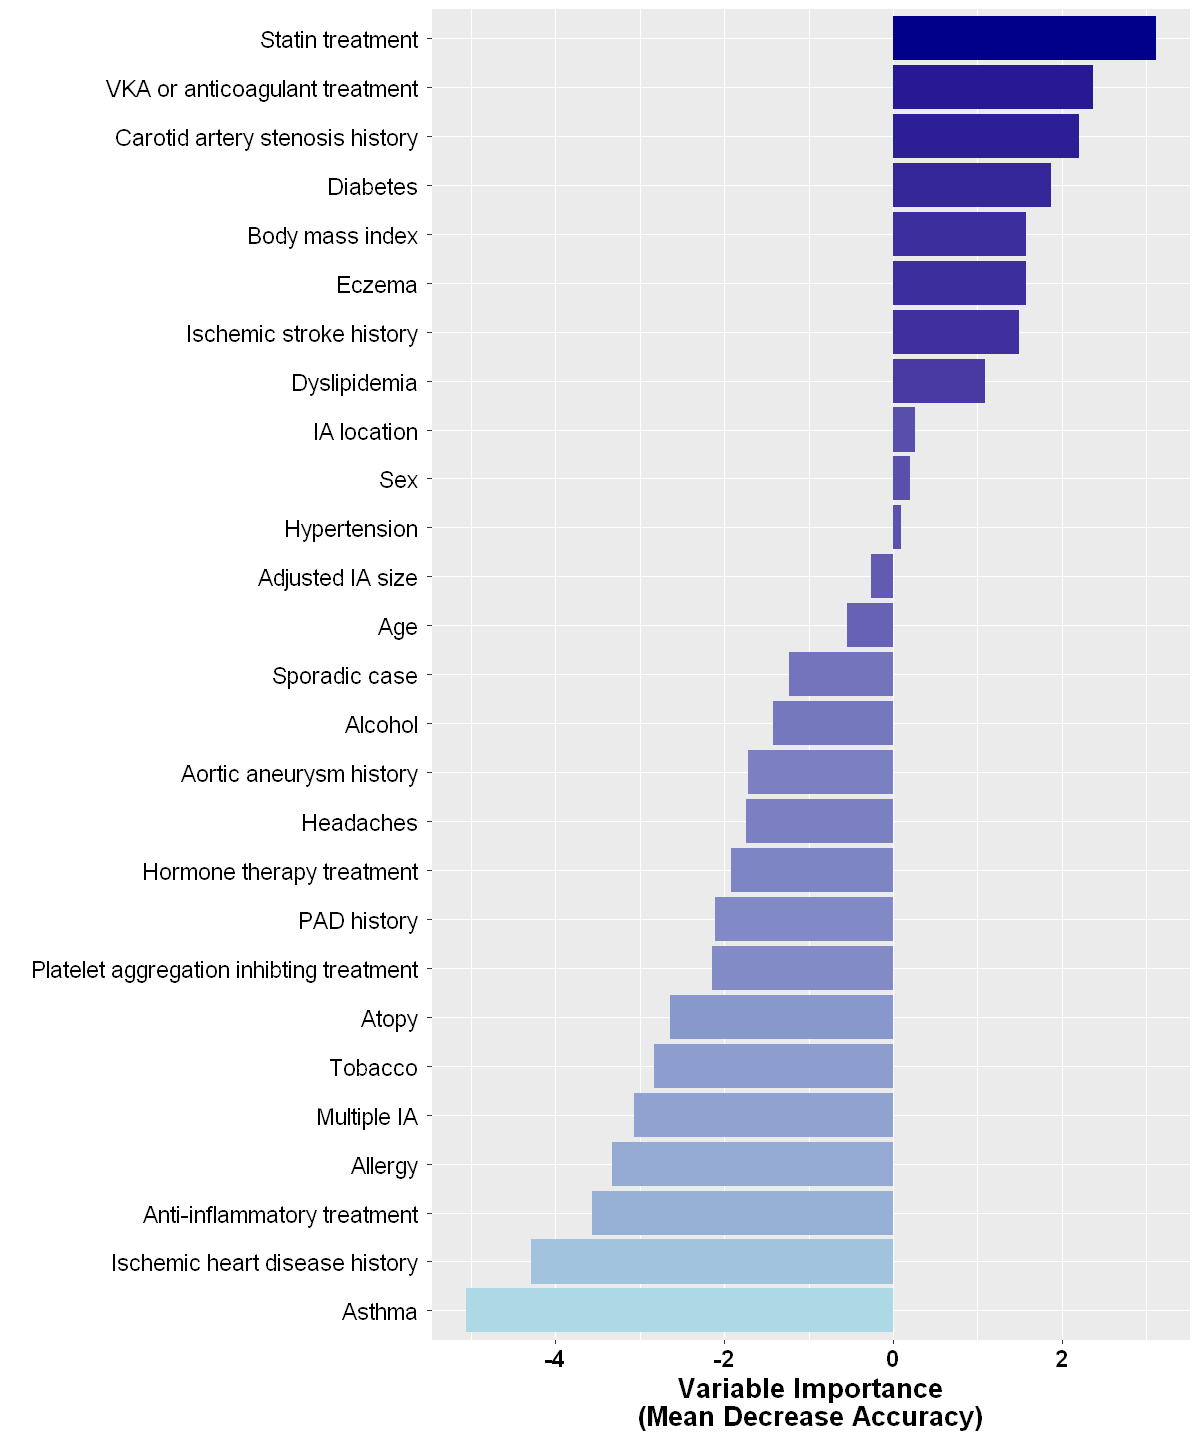

In [9]:
options(repr.plot.width = 10, repr.plot.height = 12)
ggplot(df, aes(x = reorder(index, importance), y = importance, fill = importance))+ 
    geom_bar(stat="identity", position="dodge")+ coord_flip()+
    ylab("Variable Importance\n(Mean Decrease Accuracy)")+
    xlab("")+
    theme(
    axis.title.x = element_text(color="black", size=16, face="bold"),
    axis.text.x = element_text(color="black", size=14, face = "bold"),
    axis.text.y = element_text(color="black", size=14)
    )+
    guides(fill=F)+
    scale_fill_gradient(low="lightblue", high="darkblue")